In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist


In [2]:
np.random.seed(18)
means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
N = 500
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)
K = 3


[[8.07476866 3.01494931]
 [3.02702878 5.95686115]
 [1.9834967  1.96588127]]


([], [])

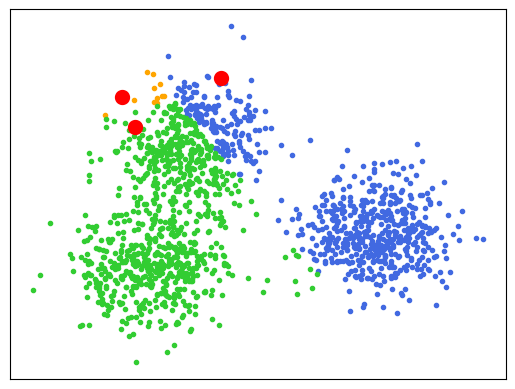

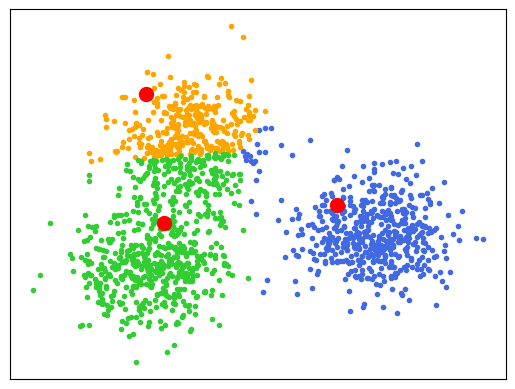

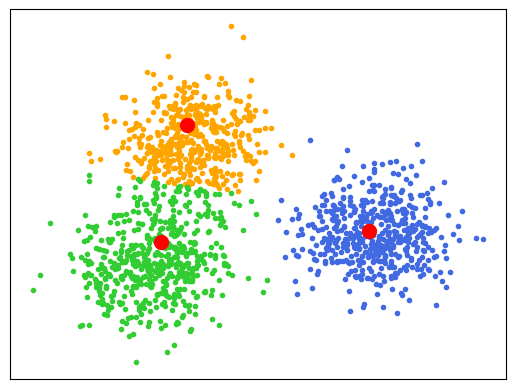

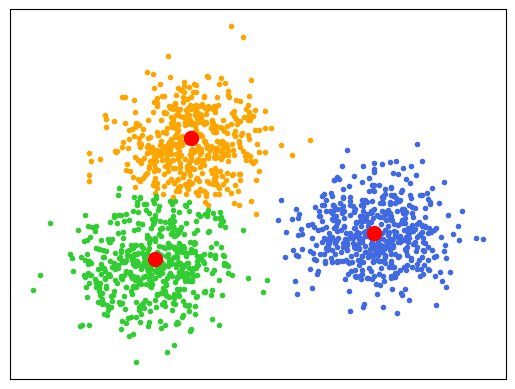

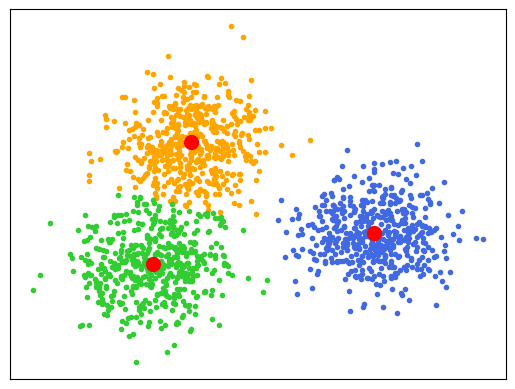

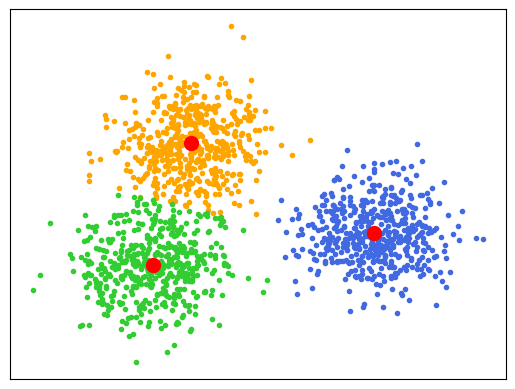

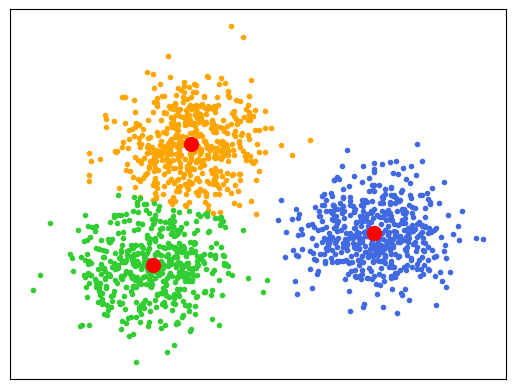

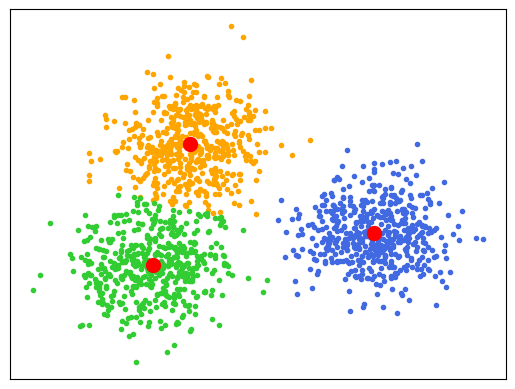

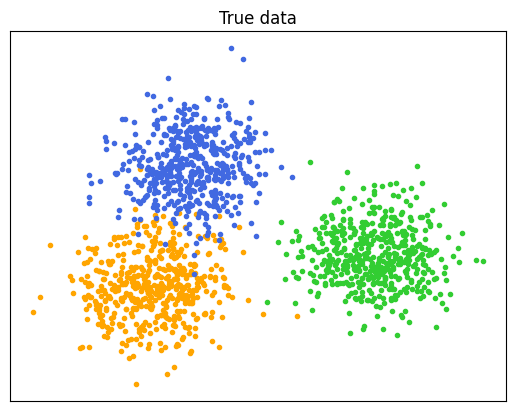

In [3]:
np.random.seed(163)

# Initialize random centroids


def init_centroids(X, k):
    return X[np.random.choice(X.shape[0], k, replace=False)]

# Assign labels for all points


def assign_label(X, centroids):
    D = cdist(X, centroids)
    return np.argmin(D, axis=1)

# Stop condition


def has_converged(centroids, new_centroids):
    return (set([tuple(a) for a in centroids]) ==
            set([tuple(a) for a in new_centroids]))

# Update centroids


def update_centroids(X, labels, K):
    centroids = np.zeros((K, X.shape[1]))
    for i in range(K):
        centroids[i, :] = np.mean(X[labels == i, :], axis=0)
    return centroids


def k_means(X, K):
    count = 0
    centroids = init_centroids(X, K)
    labels = assign_label(X, centroids)
    colors = ['royalblue', 'orange', 'limegreen']
    while True:
        # Visualize training process
        plt.figure(count)
        for i in range(K):
            plt.scatter(X[labels == i, 0], X[labels == i, 1],
                        marker='.', color=colors[i])
        plt.scatter(centroids[:, 0], centroids[:, 1],
                    marker='o', linewidths=5, color='red')
        plt.xticks([])
        plt.yticks([])
        # Update centroids
        if has_converged(centroids, update_centroids(X, labels, K)):
            break
        else:
            centroids = update_centroids(X, labels, K)
            labels = assign_label(X, centroids)
        count += 1
    return centroids


X = np.concatenate((X0, X1, X2), axis=0)
print(k_means(X, K))
plt.figure(8)
plt.title('True data')
plt.scatter(X0[:, 0], X0[:, 1], marker='.', color='orange')
plt.scatter(X1[:, 0], X1[:, 1], marker='.', color='limegreen')
plt.scatter(X2[:, 0], X2[:, 1], marker='.', color='royalblue')
plt.xticks([])
plt.yticks([])


In [4]:
l = ['12', '232']
print(''.join(l))


12232
